<a href="https://colab.research.google.com/github/walterjunjun/ColabHelper/blob/master/interact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## interact(func,**kargs)
# func: function
## kargs: key=arguments
## arguments is not iterable, --> it is fixed, 
## arguments = list[a1,b1,step=1.0],--> [min,max,step=1.0]
## [Todo]arguments = tuple (1,2,3), --> list; options to do in future
from google.colab import output
from IPython import display
def interact(func, **kargs):
  
  # parse the kargs
  fixed_kargs={}; # others
  option_kargs={}; # tuple
  slider_kargs={}; # list, min,max,step=1.0 
  slider_template = '%s :<input type="range" class="slider" id="%s" onchange="call_back()"'
  slider_template = "" +(slider_template + 
            ' min="%3.3f" max="%3.3f" step ="%3.3f" value="%3.3f" > %3.3f <br>')
  
  js_update_template = '''
  <script>
      
      document.addEventListener("DOMContentLoaded",call_back(%d))
      function call_back(is_update)
      {
        if (is_update < 0)
          return ;
          
        var obj={};
        var str_func = "notebook.add_init";
        var sliders = document.getElementsByClassName("slider");
          for(var i = 0; i < sliders.length; i++)
        {
          obj[sliders[i].id] = sliders[i].value;
        }
        if (typeof is_update === "undefined")
           is_update =1    
            
        if (is_update >0 ) 
           str_func = "notebook.add_update"      
        google.colab.kernel.invokeFunction(str_func, [], obj);        
  
      } 
  

  </script> 
  '''  
  
  
  
  
  for key in kargs:
    x= kargs[key]
    if type(x) is list:
      y=[x[0],x[1],1.0,0.5*x[0] + 0.5*x[1]];
      if len(x)>2:
        y[2]=x[2]
      slider_kargs[key] =y; 
    elif type(x) is tuple:
      option_kargs[key] = x;
    else:
      fixed_kargs[key]=x

  def generate_slider_element(a_slider_dict):
    all_html=""
    for key in a_slider_dict:
      value = a_slider_dict[key]
      ahtml = slider_template %(key, key, value[0], value[1],value[2], value[3],
                                value[3]);
      all_html = all_html + ahtml +"\n"
    return all_html;
  # do it later
  def generate_option_element(a_option_dict): # to do later    
    return "";
  
  def merge_dicts(*dict_args):
    """
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    """
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    for key in result:
      if type(result[key]) is list: # slider get value only;
        result[key] = result[key][-1] # only get value
    return result
  
  
  def update_html(a_slider_dict, state_flag=0):
    
    part1_html = generate_slider_element(a_slider_dict);
    new_html = part1_html + "\n" +(js_update_template %  state_flag)
    #print (new_html)
    display.display(display.HTML(new_html));
    return;  
  
  def update_plot(**js_kargs):
    
    display.clear_output()
    
    # update the current slider_kargs's value;
    for key in js_kargs:
      slider_kargs[key][3]=float(js_kargs[key])
    
    update_html(slider_kargs,-1);
    func_kargs=merge_dicts(fixed_kargs, slider_kargs);  
    # do what the current functions does
    return func(**func_kargs)
    
    
  def init_plot(**js_kargs):
    
    func_kargs=merge_dicts(fixed_kargs, slider_kargs);
    return func(**func_kargs)
  update_html(slider_kargs)
  output.register_callback('notebook.add_update', update_plot);
  output.register_callback('notebook.add_init', init_plot)
  
  return func;

In [0]:
# example: 
import numpy as np
import matplotlib.pyplot as plt
def test_plot(phase,ampl,factor, fix1,fix2):
  x=np.linspace(0,10,100);
  y=np.sin(factor*x + factor* x*x + phase) * ampl + fix1 * x;
  y2= np.cos(factor*x + x*x + phase) * ampl + fix2 * x;
  plt.plot(x,y)
  plt.plot(x,y2)
  plt.show()
  plt.close()

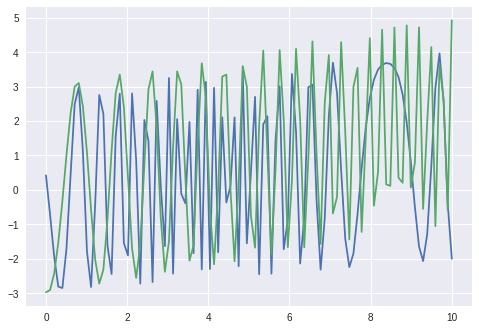

In [0]:
interact(test_plot,phase=[0.5,5,0.5], ampl=[1.0,5.0,0.5],factor=[1.0,10.0,0.5], 
         fix1=0.1, fix2=0.2)